<a href="https://colab.research.google.com/github/HasnatAbdullah/FIFA_WC_2018_Supporter_Prediction_Twitter/blob/main/The_FIFA_World_Cup_2018_Supporter_Prediction_Based_on_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data and misc

https://drive.google.com/drive/folders/1k77O1eRLUp5BLURQCnkwhEyTDm43tzWJ?usp=sharing

# Data Cleaning

#Import

In [ ]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import os
import string
from nltk.stem import PorterStemmer
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Set up paths
folder_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/Twitter data set/'
output_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'

# Define function to clean tweets
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove non-ASCII characters
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove the 'b' at the beginning of the sentence if it exists
    tweet = re.sub(r'^b\'', '', tweet)
    # Remove the ' at the end of the sentence if it exists
    tweet = re.sub(r'\'$', '', tweet)
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if not token in stop_words]
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the stemmed tokens back into a single string
    cleaned_tweet = ' '.join(stemmed_tokens)
    return cleaned_tweet

# Read in all CSV files in the folder and concatenate them into a single dataframe
df_list = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = folder_path + file
        df = pd.read_csv(file_path, header=0, names=['twitter_id', 'date', 'tweet'])
        df['User Name'] = file.split('_.')[0]
        df_list.append(df)
df_twitter = pd.concat(df_list)

# Clean the tweet data
df_twitter['cleaned_tweet'] = df_twitter['tweet'].apply(clean_tweet)

# Save the cleaned data to a new CSV file
df_twitter.to_csv(output_path, index=False)


# to solve empty tweets problem

In [ ]:
import re
import pandas as pd

# Load the cleaned tweets
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'
df_cleaned_tweets = pd.read_csv(cleaned_tweets_path)

# Define the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')

# Drop entries with only single characters or stopwords
df_cleaned_tweets['cleaned_tweet'] = df_cleaned_tweets['cleaned_tweet'].astype(str).apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords and len(word) > 1))
df_cleaned_tweets = df_cleaned_tweets[df_cleaned_tweets['cleaned_tweet'] != '']

# Save the cleaned tweets in a new CSV file
cleaned_tweets_new_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets_new.csv'
df_cleaned_tweets.to_csv(cleaned_tweets_new_path, index=False)


# to see if clean function is working

In [ ]:
import pandas as pd
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

# Define path to folder containing CSV files
folder_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/Twitter data set/'

# Define function to clean tweets
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove non-ASCII characters
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove the 'b' at the beginning of the sentence if it exists
    tweet = re.sub(r'^b\'', '', tweet)
    # Remove the ' at the end of the sentence if it exists
    tweet = re.sub(r'\'$', '', tweet)
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if not token in stop_words]
    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # Join the stemmed tokens back into a single string
    cleaned_tweet = ' '.join(stemmed_tokens)
    return cleaned_tweet

# Create empty list to store dataframes
df_list = []

# Loop through CSV files in folder and append to list
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = folder_path + file
        # Read CSV file into pandas dataframe
        df = pd.read_csv(file_path, header=None, names=['twitter_id', 'date', 'tweet'])
        # Clean tweets
        df['tweet'] = df['tweet'].apply(clean_tweet)
        # Add dataframe to list
        df_list.append(df)

# Concatenate dataframes in list into one dataframe
df = pd.concat(df_list, axis=0, ignore_index=True)

# Print first 5 rows of dataframe
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


            twitter_id                 date  \
0           twitter_id                 date   
1  1039854308710178817  2018-09-12 12:32:41   
2  1039779992480178176  2018-09-12 07:37:23   
3  1039779136653410304  2018-09-12 07:33:58   
4  1039417972123729921  2018-09-11 07:38:50   

                                               tweet  
0                                              tweet  
1  brt standard practic onlin support ask passwor...  
2                b idiot actual let honest your dick  
3  brt 3 bulli vicious attack muslim kid west whi...  
4                    b mr bollywood accus other copi  


# 0. Data Properties


# Print the first five rows of the data
    No Used Name        User Name       Team   City  No of Tweet Team_short
0   18      U_18     _abdulafaan_  Argentina  Delhi          399        ARG
1  371     U_371      _GeorgeM_11     Brazil    NaN         2937        BRA
2  329     U_329    _terrymcmanus     Brazil    NaN         1627        BRA
3  369     U_369  15CharactersOrL     Brazil    NaN         3116        BRA
4  250     U_250   21stCentPundit     France    NaN         3194        FRA

Check the number of rows and columns in the data
(376, 7)

Check the data types of the columns
No              int64
Used Name      object
User Name      object
Team           object
City           object
No of Tweet     int64
Team_short     object
dtype: object

Check if there are any missing values
No               0
Used Name        0
User Name        0
Team             0
City           201
No of Tweet      0
Team_short       0
dtype: int64

 Check the distribution of the target variable


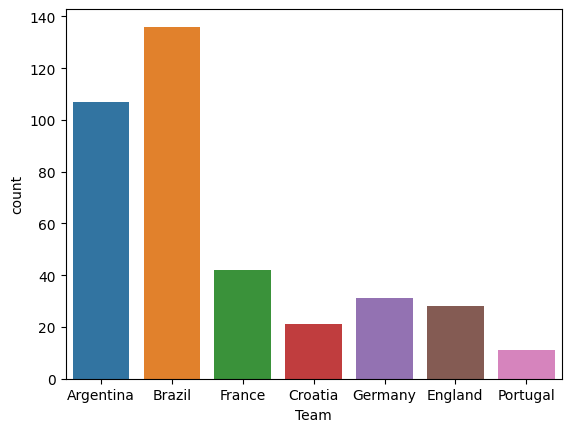


Check the distribution of the new feature


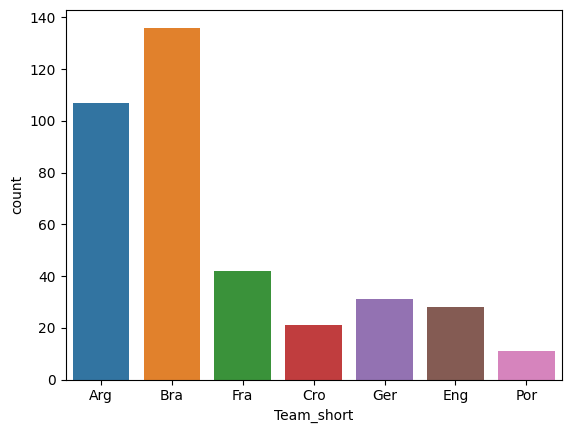


Check the first five rows of the encoded data
    No       Team  No of Tweet  Used Name_U_1  Used Name_U_10  \
0   18  Argentina          399              0               0   
1  371     Brazil         2937              0               0   
2  329     Brazil         1627              0               0   
3  369     Brazil         3116              0               0   
4  250     France         3194              0               0   

   Used Name_U_100  Used Name_U_101  Used Name_U_102  Used Name_U_103  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Used Name_U_104  ...  City_Jakarta  City_Kolkata  City_Malaysia  \
0                0  ...             0             0  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
df = pd.read_excel(file_path)

# Print the first five rows of the data
print('')
print('# Print the first five rows of the data')
print(df.head())

# Check the number of rows and columns in the data
print('')
print('Check the number of rows and columns in the data')
print(df.shape)

# Check the data types of the columns
print('')
print('Check the data types of the columns')
print(df.dtypes)

# Check if there are any missing values
print('')
print('Check if there are any missing values')
print(df.isnull().sum())

# Check the distribution of the target variable
print('')
print(' Check the distribution of the target variable')
sns.countplot(x='Team', data=df)
plt.show()

# Extract the short code of the teams from the second Team column
df['Team_short'] = df['Team'].apply(lambda x: x[:3])

# Check the distribution of the new feature
print('')
print('Check the distribution of the new feature')
sns.countplot(x='Team_short', data=df)
plt.show()

# Encode the categorical variables
df_encoded = pd.get_dummies(df, columns=['Used Name', 'User Name', 'Team_short', 'City'])

# Check the first five rows of the encoded data
print('')
print('Check the first five rows of the encoded data')
print(df_encoded.head())


# 1. Classification problem

##T-Test

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the excel file
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# Convert the "No of Tweet" column to numeric
df['No of Tweet'] = pd.to_numeric(df['No of Tweet'], errors='coerce')

# Separate the data by teams
team_data = {team: df[df['Team_short'] == team] for team in df['Team_short'].unique()}

# Perform t-tests for each team against all other teams
for team, data in team_data.items():
    print(f"T-tests for {team}:")
    for other_team, other_data in team_data.items():
        if team != other_team:
            t, p = ttest_ind(data['No of Tweet'], other_data['No of Tweet'])
            print(f"{team} vs {other_team}: t = {t:.3f}, p = {p:.3f}")


T-tests for ARG:
ARG vs BRA: t = -1.235, p = 0.218
ARG vs FRA: t = -0.229, p = 0.819
ARG vs CRO: t = -1.336, p = 0.184
ARG vs GER: t = 0.131, p = 0.896
ARG vs ENG: t = 0.004, p = 0.997
ARG vs POR: t = -0.863, p = 0.390
T-tests for BRA:
BRA vs ARG: t = 1.235, p = 0.218
BRA vs FRA: t = 0.669, p = 0.505
BRA vs CRO: t = -0.716, p = 0.475
BRA vs GER: t = 0.948, p = 0.345
BRA vs ENG: t = 0.777, p = 0.439
BRA vs POR: t = -0.394, p = 0.694
T-tests for FRA:
FRA vs ARG: t = 0.229, p = 0.819
FRA vs BRA: t = -0.669, p = 0.505
FRA vs CRO: t = -1.055, p = 0.296
FRA vs GER: t = 0.287, p = 0.775
FRA vs ENG: t = 0.171, p = 0.865
FRA vs POR: t = -0.684, p = 0.497
T-tests for CRO:
CRO vs ARG: t = 1.336, p = 0.184
CRO vs BRA: t = 0.716, p = 0.475
CRO vs FRA: t = 1.055, p = 0.296
CRO vs GER: t = 1.237, p = 0.222
CRO vs ENG: t = 1.104, p = 0.275
CRO vs POR: t = 0.116, p = 0.908
T-tests for GER:
GER vs ARG: t = -0.131, p = 0.896
GER vs BRA: t = -0.948, p = 0.345
GER vs FRA: t = -0.287, p = 0.775
GER vs CRO: 

## Anova (Try again)

<ipython-input-50-636478b8255f>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_team_counts = df_team_counts.append({'Team': team, 'Count': count}, ignore_index=True)
<ipython-input-50-636478b8255f>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_team_counts = df_team_counts.append({'Team': team, 'Count': count}, ignore_index=True)
<ipython-input-50-636478b8255f>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_team_counts = df_team_counts.append({'Team': team, 'Count': count}, ignore_index=True)
<ipython-input-50-636478b8255f>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_team_counts = df_team_counts.append({'Team'

F-value: 899.8115165789781
P-value: 0.0


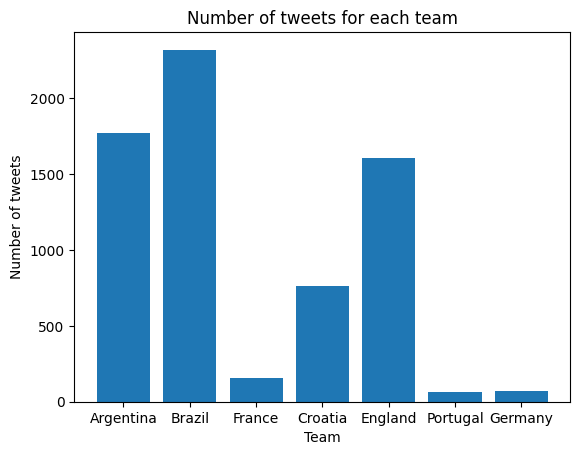

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the cleaned tweets
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'
df_cleaned_tweets = pd.read_csv(cleaned_tweets_path)

# Load the fans' data
fans_data_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
df_fans_data = pd.read_excel(fans_data_path, header=0, usecols=['User Name', 'Team'])

# Merge the two dataframes on the User Name column
df_merged = pd.merge(df_cleaned_tweets, df_fans_data, on='User Name')

# Convert the short code of the teams in the fans' data to their full names
team_mapping = {'BRA': 'Brazil', 'FRA': 'France', 'CRO': 'Croatia', 'ENG': 'England', 'POR': 'Portugal', 'GER': 'Germany'}
df_merged['Team'] = df_merged['Team'].map(team_mapping)

# Create a new column in the merged dataframe to indicate whether a tweet is about a particular team
teams = ['Argentina', 'Brazil', 'France', 'Croatia', 'England', 'Portugal', 'Germany']
for team in teams:
    df_merged[team] = df_merged['cleaned_tweet'].apply(lambda x: 1 if team.lower() in str(x) else 0)

# Calculate the number of tweets for each team and store them in a new dataframe
df_team_counts = pd.DataFrame(columns=['Team', 'Count'])
for team in teams:
    count = df_merged[team].sum()
    df_team_counts = df_team_counts.append({'Team': team, 'Count': count}, ignore_index=True)

# Perform an ANOVA test to see if there is a significant difference between the mean number of tweets for each team
f_value, p_value = f_oneway(df_merged['Argentina'], df_merged['Brazil'], df_merged['France'], df_merged['Croatia'], df_merged['England'], df_merged['Portugal'], df_merged['Germany'])
print('F-value:', f_value)
print('P-value:', p_value)

# Visualize the results using a bar chart to compare the mean number of tweets for each team
plt.bar(df_team_counts['Team'], df_team_counts['Count'])
plt.title('Number of tweets for each team')
plt.xlabel('Team')
plt.ylabel('Number of tweets')
plt.show()


## Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data
file_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
df = pd.read_excel(file_path)

# Prepare the data
X = df[['Used Name', 'City', 'No of Tweet']]
y = df['Team']

# Convert categorical variables into numerical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.32894736842105265
Confusion matrix:
 [[ 4 21  2  0  0  0  0]
 [ 3 21  0  0  0  0  0]
 [ 2  2  0  0  1  0  0]
 [ 2  5  1  0  1  0  0]
 [ 0  5  2  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]]
Classification report:
               precision    recall  f1-score   support

   Argentina       0.33      0.15      0.21        27
      Brazil       0.37      0.88      0.52        24
     Croatia       0.00      0.00      0.00         5
     England       0.00      0.00      0.00         9
      France       0.00      0.00      0.00         7
     Germany       0.00      0.00      0.00         3
    Portugal       0.00      0.00      0.00         1

    accuracy                           0.33        76
   macro avg       0.10      0.15      0.10        76
weighted avg       0.23      0.33      0.24        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AdaBoost

In [5]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the cleaned tweets data
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'
df_cleaned_tweets = pd.read_csv(cleaned_tweets_path)

# Load the Twitter data set with predicted teams
twitter_data_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
df_twitter_data = pd.read_excel(twitter_data_path)

# Merge the cleaned tweets with the predicted teams data
df_merged = pd.merge(df_cleaned_tweets, df_twitter_data[['User Name', 'Team']], on='User Name')

# Drop any rows with missing values
df_merged.dropna(subset=['cleaned_tweet', 'Team'], inplace=True)

# Split the data into features (X) and target labels (y)
X = df_merged['cleaned_tweet']
y = df_merged['Team']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and vectorize the text data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train.values)
X_test = tokenizer.texts_to_sequences(X_test.values)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Encode the target labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Create the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=100)

# Train the classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.371298831718864


## K-Nearest Neighbors (KNN) classifier

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Set the file and folder paths
folder_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/Twitter data set/'
twitter_data_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'

# Load the Twitter data
twitter_data = pd.read_excel(twitter_data_path)

# Load the cleaned tweets
cleaned_tweets = pd.read_csv(cleaned_tweets_path)

# Merge the Twitter data with the cleaned tweets
df = pd.merge(cleaned_tweets, twitter_data[['User Name', 'Team']], on='User Name')

# Drop any rows with missing values
df.dropna(subset=['cleaned_tweet'], inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['Team'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_vec)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.37005757199618267


# Decision Tree

In [ ]:

# Load the FIFA supporter data
file_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
df = pd.read_excel(file_path)
# print(df.head())
print(df.dtypes)


No              int64
Used Name      object
User Name      object
Team           object
City           object
No of Tweet     int64
Team_short     object
dtype: object


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Twitter data
folder_path ='/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
twitter_data = pd.read_excel(folder_path , usecols=[3, 6])

# Map countries to numerical labels
team_labels = {
    'Brazil': 0,
    'France': 1,
    'Croatia': 2,
    'England': 3,
    'Portugal': 4,
    'Germany': 5,
    'Argentina': 6
}
twitter_data['Team'] = twitter_data['Team'].apply(lambda x: team_labels[x])

# Map team short codes to numerical labels
team_short_labels = {
    'BRA': 0,
    'FRA': 1,
    'CRO': 2,
    'ENG': 3,
    'POR': 4,
    'GER': 5,
    'ARG': 6
}
twitter_data['Team_short'] = twitter_data['Team_short'].apply(lambda x: team_short_labels[x])

# Split data into train and test sets
train_size = int(0.8 * len(twitter_data))
train_data = twitter_data[:train_size]
test_data = twitter_data[train_size:]

# Separate features and labels
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Train decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


# 2. Data Balancing Using SMOTE

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')


print(df.head())

    No Used Name        User Name       Team   City  No of Tweet Team_short
0   18      U_18     _abdulafaan_  Argentina  Delhi          399        ARG
1  371     U_371      _GeorgeM_11     Brazil    NaN         2937        BRA
2  329     U_329    _terrymcmanus     Brazil    NaN         1627        BRA
3  369     U_369  15CharactersOrL     Brazil    NaN         3116        BRA
4  250     U_250   21stCentPundit     France    NaN         3194        FRA


RandomForestClassifier after SMOTE

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# load the data
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# select the features and target
X = df.drop(['Team_short', 'Used Name', 'No of Tweet','No'], axis=1)
y = df['Team_short']

# encode categorical features
cat_cols = ['User Name', 'Team', 'City']
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(X[cat_cols])
X_num = X.drop(cat_cols, axis=1)
X_encoded = pd.concat([pd.DataFrame(X_cat.toarray()), X_num.reset_index(drop=True)], axis=1)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# apply SMOTE to the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# train a machine learning model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# evaluate the model
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ARG       1.00      1.00      1.00        27
         BRA       1.00      1.00      1.00        24
         CRO       1.00      1.00      1.00         5
         ENG       1.00      1.00      1.00         9
         FRA       1.00      1.00      1.00         7
         GER       1.00      1.00      1.00         3
         POR       1.00      1.00      1.00         1

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



##2.2 Feature Reduction Using PCA

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Load the cleaned tweets
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'
df_cleaned_tweets = pd.read_csv(cleaned_tweets_path)

# Select the features for PCA
features = df_cleaned_tweets.drop(['twitter_id', 'date', 'tweet', 'User Name', 'cleaned_tweet'], axis=1)

# Perform one-hot encoding for categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features)

# Apply PCA for feature reduction
pca = PCA(n_components=2)  # Set the desired number of components
reduced_features = pca.fit_transform(encoded_features.toarray())

# Create a new dataframe with the reduced features
df_reduced_features = pd.DataFrame(data=reduced_features, columns=['PC1', 'PC2'])

# Merge the reduced features with the remaining columns
df_final = pd.concat([df_reduced_features, df_cleaned_tweets[['twitter_id', 'date', 'tweet', 'User Name', 'cleaned_tweet']]], axis=1)

# Save the cleaned and reduced features to a new CSV file
reduced_features_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/reduced_features.csv'
df_final.to_csv(reduced_features_path, index=False)


ValueError: ignored

 visualize the PCA processed tweet features using a scatter plot:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reduced features data
reduced_features_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/reduced_features.csv'
df_reduced_features = pd.read_csv(reduced_features_path)

# Extract the reduced feature columns
pc1 = df_reduced_features['PC1']
pc2 = df_reduced_features['PC2']

# Plot the reduced features using a scatter plot
plt.scatter(pc1, pc2)
plt.title('PCA Processed Tweet Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# 3. K-Means clustering and visualization with scatter plots:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 2 clusters: 0.006862831719348529


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 3 clusters: 0.0030010499343414852


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 4 clusters: 0.003943038036425798


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 5 clusters: 0.005785943768853248


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 6 clusters: 0.005831290408811427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 7 clusters: 0.005274838325057205


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 8 clusters: 0.007005702359356414


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 9 clusters: 0.007510680966164004


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for 10 clusters: 0.006784539868579114


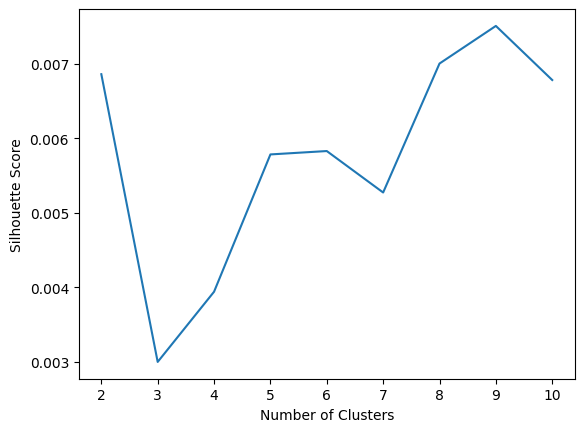

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


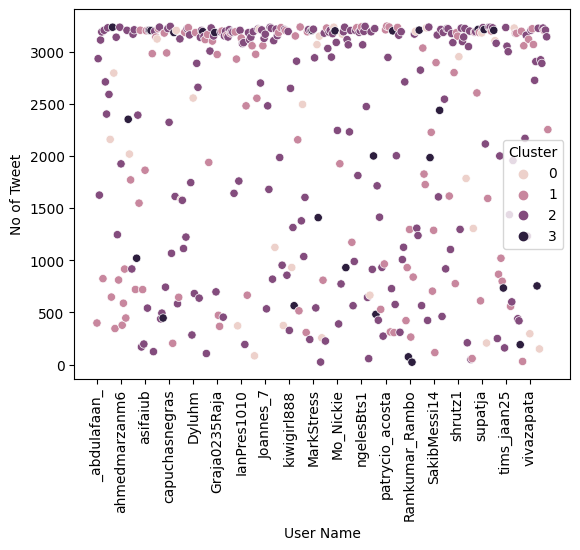

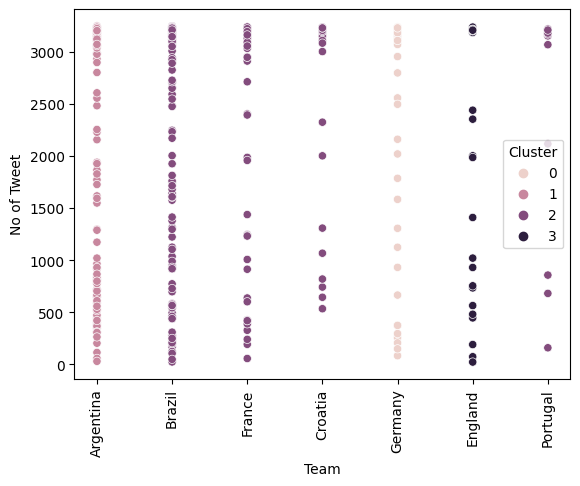

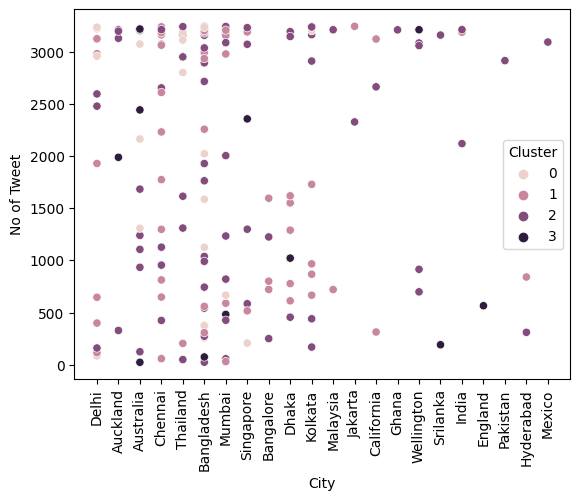

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# load the data
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# select the features for clustering
X = df[['User Name', 'Team', 'City', 'No of Tweet']]

# encode categorical features
encoder = pd.get_dummies(X[['User Name', 'Team', 'City']])
X_encoded = pd.concat([encoder, X[['No of Tweet']]], axis=1)

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# perform K-Means clustering with different number of clusters
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
    print(f"Silhouette score for {k} clusters: {score}")

# plot the silhouette scores for each number of clusters
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# choose the number of clusters based on the silhouette score plot
n_clusters = 4

# perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# visualize the clusters with scatter plots

# sns.scatterplot(x='User Name', y='No of Tweet', hue='Cluster', data=df)
# plt.xticks(rotation=90)
# plt.show()
sns.scatterplot(x='User Name', y='No of Tweet', hue='Cluster', data=df)
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df), step=20)) # show every 20th label
plt.show()

sns.scatterplot(x='Team', y='No of Tweet', hue='Cluster', data=df)
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='City', y='No of Tweet', hue='Cluster', data=df)
plt.xticks(rotation=90)
plt.show()


# 4.1 linear regression:

Mean Squared Error: 0.0026598800531930427


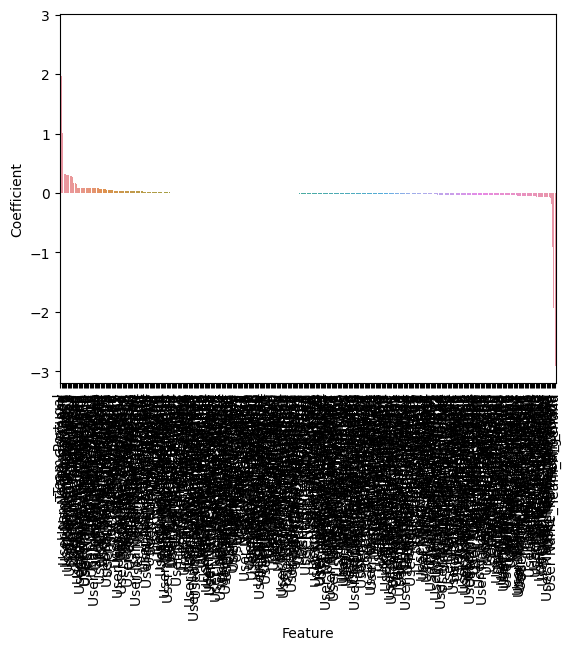

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


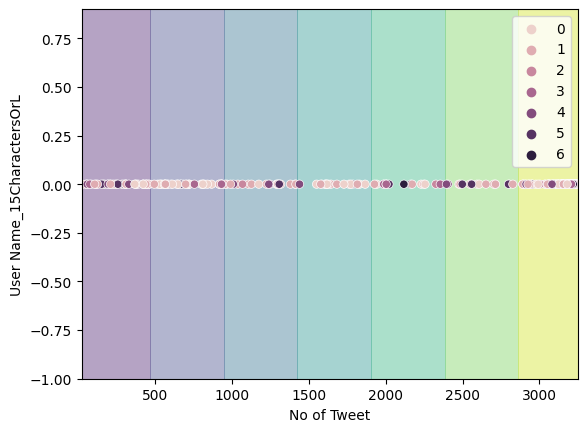

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# select the features and target
X = df.drop(['No', 'Used Name', 'Team_short'], axis=1)
y = df['Team_short']

# encode categorical features
cat_cols = ['User Name', 'Team', 'City']
X = pd.get_dummies(X, columns=cat_cols)

# encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# make predictions on the test set
y_pred = reg.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# plot the coefficients of the model
coef_df = pd.DataFrame({'Coefficient': reg.coef_, 'Feature': X.columns})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.xticks(rotation=90)
plt.show()

# plot the decision boundaries of the model
# (requires only two numerical features)
if X_train.shape[1] >= 2:
    X_train_2d = X_train.iloc[:, :2]
    reg.fit(X_train_2d, y_train)
    x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
    y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    sns.scatterplot(x=X_train_2d.iloc[:, 0], y=X_train_2d.iloc[:, 1], hue=y_train)
    plt.show()


# 4.2 Logistic regression:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         ARG       1.00      1.00      1.00        27
         BRA       1.00      1.00      1.00        24
         CRO       1.00      1.00      1.00         5
         ENG       1.00      1.00      1.00         9
         FRA       1.00      1.00      1.00         7
         GER       1.00      1.00      1.00         3
         POR       1.00      1.00      1.00         1

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



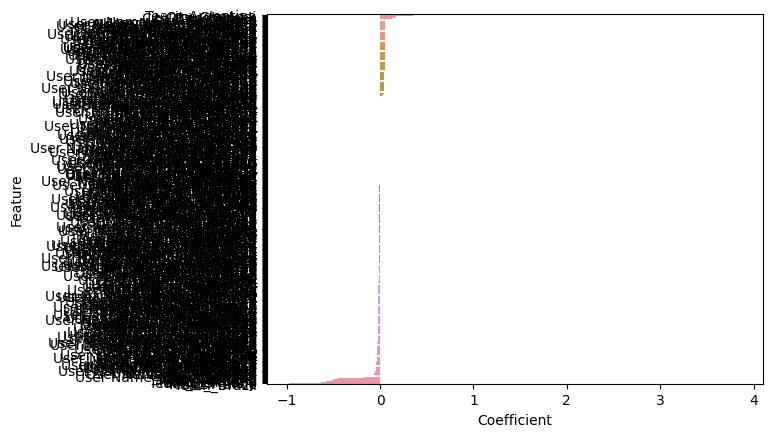


Null or infinite
No of Tweet                  0
User Name_15CharactersOrL    0
User Name_21stCentPundit     0
User Name_3dundertaker       0
User Name_88TheDon           0
                            ..
City_Pakistan                0
City_Singapore               0
City_Srilanka                0
City_Thailand                0
City_Wellington              0
Length: 406, dtype: int64
No of Tweet                  0
User Name_15CharactersOrL    0
User Name_21stCentPundit     0
User Name_3dundertaker       0
User Name_88TheDon           0
                            ..
City_Pakistan                0
City_Singapore               0
City_Srilanka                0
City_Thailand                0
City_Wellington              0
Length: 406, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# select the features and target
X = df.drop(['No', 'Used Name', 'Team_short'], axis=1)
y = df['Team_short']

# encode categorical features
cat_cols = ['User Name', 'Team', 'City']
X = pd.get_dummies(X, columns=cat_cols)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# plot the coefficients of the model
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': clf.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.show()

# plot the decision boundaries of the model
# (requires only two numerical features)
print('')
print('Null or infinite')
print(np.isnan(X_train).sum())
print(np.isinf(X_train).sum())


# if X_train.shape[1] >= 2:
#     X_train_2d = X_train.iloc[:, :2]
#     clf.fit(X_train_2d, y_train)
#     x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
#     y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
#                          np.arange(y_min, y_max, 0.1))
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, alpha=0.4)
#     sns.scatterplot(x=X_train_2d.iloc[:, 0], y=X_train_2d.iloc[:, 1], hue=y_train)
#     plt.show()


# File cleaning due to missing from twitter.xlsx

In [ ]:
import pandas as pd

# Load the cleaned tweets data
cleaned_tweets = pd.read_csv('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv')

# Load the Twitter data
twitter_data = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# Filter the cleaned tweets to only include users whose Team and User Name are in the Twitter data
cleaned_tweets_with_team = cleaned_tweets[cleaned_tweets['User Name'].isin(twitter_data['User Name'])]
cleaned_tweets_with_team = cleaned_tweets_with_team.merge(twitter_data[['User Name', 'Team']], on='User Name', how='inner')

# Save the cleaned tweets with Team information to a new CSV file
# cleaned_tweets_with_team.to_csv('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets_with_team.csv', index=False)

print(cleaned_tweets_with_team.head(10))

            twitter_id                 date  \
0  1039854308710178817  2018-09-12 12:32:41   
1  1039779992480178176  2018-09-12 07:37:23   
2  1039779136653410304  2018-09-12 07:33:58   
3  1039417972123729921  2018-09-11 07:38:50   
4  1039194066632810498  2018-09-10 16:49:07   
5  1039176916371218432  2018-09-10 15:40:58   
6  1039166791174561793  2018-09-10 15:00:44   
7  1038524730129702915  2018-09-08 20:29:25   
8  1037297435511582721  2018-09-05 11:12:35   
9  1035964252648034305  2018-09-01 18:54:59   

                                               tweet        User Name  \
0  b'RT @Mufc_Rascal: So @virginmedia , is it sta...  15CharactersOrL   
1  b"@abhinavachanak @TheFieldMuslim @kanimozhi I...  15CharactersOrL   
2  b'RT @TheFieldMuslim: 3 bullies viciously atta...  15CharactersOrL   
3  b'@Madhav091 @Honeybunjabi You. Mr Bollywood. ...  15CharactersOrL   
4  b'RT @ArrVieira: I just woke up right now afte...  15CharactersOrL   
5  b"RT @thehistoryguy: Here's where I'm at 

In [ ]:
import pandas as pd

# read the twitter.xlsx file
twitter_data_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
twitter_data = pd.read_excel(twitter_data_path)

# merge the twitter data with the cleaned tweets based on the User Name column
cleaned_tweets_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv'
cleaned_tweets = pd.read_csv(cleaned_tweets_path)
cleaned_tweets_with_team = pd.merge(cleaned_tweets, twitter_data[['User Name', 'Team']], on='User Name')

# print the first 10 rows of the resulting DataFrame
print(twitter_data.head(10))
print('')
print(cleaned_tweets.head(10))
print('')
print(cleaned_tweets_with_team.head(10))

    No Used Name        User Name       Team      City  No of Tweet Team_short
0   18      U_18     _abdulafaan_  Argentina     Delhi          399        ARG
1  371     U_371      _GeorgeM_11     Brazil       NaN         2937        BRA
2  329     U_329    _terrymcmanus     Brazil       NaN         1627        BRA
3  369     U_369  15CharactersOrL     Brazil       NaN         3116        BRA
4  250     U_250   21stCentPundit     France       NaN         3194        FRA
5  374     U_374     3dundertaker  Argentina       NaN          825        ARG
6   81      U_81         88TheDon     France  Auckland         3210        FRA
7  198     U_198          974rami     France       NaN         2714        FRA
8  192     U_192     aaronmelloul     France       NaN         2405        FRA
9  239     U_239      aashnisshah    Croatia       NaN         3233        CRO

            twitter_id                 date  \
0  1039854308710178817  2018-09-12 12:32:41   
1  1039779992480178176  2018-09-12 0

###Find Out which users are not in Twitter.xlsx

In [ ]:
import os
import pandas as pd

# Set the path to the directory containing the CSV files
directory_path = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/Twitter data set/'

# Get a list of all the CSV files in the directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Get a list of all the User Names in the Twitter data
twitter_data = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')
twitter_usernames = list(twitter_data['User Name'])

# Get a list of all the User Names in the CSV files
csv_usernames = [f.replace('_.csv', '') for f in csv_files]

# Identify which users User Name is not in Twitter data but exists in the CSV files
missing_usernames = set(csv_usernames) - set(twitter_usernames)

# Print the missing User Names
print('Missing User Names:')
for username in missing_usernames:
    print(username)


Missing User Names:


Missing User Names:
AParthianShot
Subbu_06
umshahadat 
KittyHoneyCos

 ### move the CSV files of missing_usernames to the missmatch folder:

In [ ]:
import os

tweet_dir = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/Twitter data set/'
twitter_data = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx'
mismatch_dir = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/missmatch/'

# Read Twitter data into a dataframe
twitter_df = pd.read_excel(twitter_data)

# Get list of Twitter usernames
twitter_usernames = list(twitter_df['User Name'])

# Get list of all usernames
usernames = [filename.split('_.')[0] for filename in os.listdir(tweet_dir) if filename.endswith('.csv')]

# Get list of missing usernames
missing_usernames = [username for username in usernames if username not in twitter_usernames]

# Move mismatched files to mismatch_dir
for username in missing_usernames:
    os.rename(os.path.join(tweet_dir, f'{username}_.csv'), os.path.join(mismatch_dir, f'{username}_.csv'))


# 5. LSTM & RNN

## 5.1 RNN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

# load the cleaned tweets data
cleaned_tweets = pd.read_csv('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv')

# load the twitter data set with predicted teams
twitter_data = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# merge the cleaned tweets with the predicted teams data
df = pd.merge(cleaned_tweets, twitter_data[['User Name', 'Team']], on='User Name')

# drop any rows with NaN values in the 'cleaned_tweet' column
df.dropna(subset=['cleaned_tweet'], inplace=True)

# preprocess the text data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['cleaned_tweet'].values)
X = tokenizer.texts_to_sequences(df['cleaned_tweet'].values)
X = pad_sequences(X, maxlen=100)

# encode the target labels
le = LabelEncoder()
y = le.fit_transform(df['Team'].values)

# build the RNN model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(X, y, batch_size=128, epochs=10, validation_split=0.2)

# evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
5010/5010 [==============================] - 3393s 676ms/step - loss: 1.4498 - accuracy: 0.4439 - val_loss: 1.6088 - val_accuracy: 0.3821
Epoch 2/10
5010/5010 [==============================] - 3306s 660ms/step - loss: 1.3797 - accuracy: 0.4689 - val_loss: 1.6149 - val_accuracy: 0.3799
Epoch 3/10
5010/5010 [==============================] - 3298s 658ms/step - loss: 1.3529 - accuracy: 0.4789 - val_loss: 1.6224 - val_accuracy: 0.3772
Epoch 4/10
5010/5010 [==============================] - 3310s 661ms/step - loss: 1.3301 - accuracy: 0.4880 - val_loss: 1.6553 - val_accuracy: 0.3760
Epoch 5/10
5010/5010 [==============================] - 3287s 656ms/step - loss: 1.3098 - accuracy: 0.4963 - val_loss: 1.6739 - val_accuracy: 0.3726
Epoch 6/10
2214/5010 [============>.................] - ETA: 27:56 - loss: 1.2842 - accuracy: 0.5052

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

# load the cleaned tweets data
cleaned_tweets = pd.read_csv('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/cleaned_tweets.csv')

# load the twitter data set with predicted teams
twitter_data = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# merge the cleaned tweets with the predicted teams data
df = pd.merge(cleaned_tweets, twitter_data[['User Name', 'Team']], on='User Name')

# drop any rows with NaN values in the 'cleaned_tweet' column
df.dropna(subset=['cleaned_tweet'], inplace=True)

# preprocess the text data
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(df['cleaned_tweet'].values)
X = tokenizer.texts_to_sequences(df['cleaned_tweet'].values)
X = pad_sequences(X, maxlen=100)

# encode the target labels
le = LabelEncoder()
y = le.fit_transform(df['Team'].values)

# build the RNN model
model = Sequential()
model.add(Embedding(5000, 64, input_length=100))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# define the callback to save the model and data after every epoch
checkpoint_filepath = '/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/model_checkpoint'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_freq='epoch',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# train the model
model.fit(X, y, batch_size=128, epochs=10, validation_split=0.2, callbacks=[checkpoint_callback])

# load the saved model and data
model = tf.keras.models.load_model(checkpoint_filepath)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned_tweet'].values)
X_test = tokenizer.texts_to_sequences(df['cleaned_tweet'].values)
X_test = pad_sequences(X_test, maxlen=100)
y_test = le.transform(df['Team'].values)

# evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


## 5.2 LSTM

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# load the data
df = pd.read_excel('/content/drive/MyDrive/Second Semester/data analytics/FIFA_Supporter/FIFA_Supporter/tweets/twitter.xlsx')

# select the features and target
X = df['User Name']
y = df['Team_short']


# encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences, padding='post', maxlen=50)
y_encoded = to_categorical(y)

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# build the model
model = Sequential()
model.add(Embedding(10000, 64, input_length=50))
model.add(LSTM(64))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)


Epoch 1/10
8/8 [==============================] - 3s 134ms/step - loss: 1.8647 - accuracy: 0.3208 - val_loss: 1.6329 - val_accuracy: 0.3500
Epoch 2/10
8/8 [==============================] - 0s 56ms/step - loss: 1.6791 - accuracy: 0.3792 - val_loss: 1.6687 - val_accuracy: 0.3500
Epoch 3/10
8/8 [==============================] - 1s 81ms/step - loss: 1.6826 - accuracy: 0.3792 - val_loss: 1.5693 - val_accuracy: 0.3500
Epoch 4/10
8/8 [==============================] - 1s 76ms/step - loss: 1.6691 - accuracy: 0.3792 - val_loss: 1.5742 - val_accuracy: 0.3500
Epoch 5/10
8/8 [==============================] - 1s 69ms/step - loss: 1.6656 - accuracy: 0.3792 - val_loss: 1.5614 - val_accuracy: 0.3500
Epoch 6/10
8/8 [==============================] - 1s 68ms/step - loss: 1.6715 - accuracy: 0.3792 - val_loss: 1.5674 - val_accuracy: 0.3500
Epoch 7/10
8/8 [==============================] - 1s 135ms/step - loss: 1.6654 - accuracy: 0.3792 - val_loss: 1.6075 - val_accuracy: 0.3500
Epoch 8/10
8/8 [=========